# Modeling data with sklearn

In [20]:
import math
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoLars, BayesianRidge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR

%matplotlib inline

## 1. Data cleaning

In [2]:
diamonds = pd.read_csv("../data/diamonds_train.csv")

# Drop columns
diamonds.drop(columns = "Unnamed: 0", inplace = True)

# Get dummy columns
diamonds = pd.get_dummies(diamonds)

In [3]:
X = diamonds.drop(columns = "price")
y = diamonds[["price"]]

In [4]:
#scaler = MinMaxScaler() #StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)
#X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

## 2. Training
Divide the set in train and test.

In [5]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Select some regression models.

In [6]:
regmodels = {
    #"OLS": LinearRegression(), # RMSE = 1095/ 1148
    #"ridge": Ridge(alpha=0.5), # RMSE = 1088/ 1147
    #"lasso": Lasso(alpha=0.1), # RMSE = 1087/ 1147
    #"lassolars": LassoLars(alpha=0.1), # RMSE = 1107/ 1179
    #"bayrid": BayesianRidge(n_iter=600), # RMSE = 1094/ 1148
    #"SVR": SVR(kernel="poly", verbose = True, max_iter=500), # RMSE = 6183/ 4585
    "RF": RandomForestRegressor(n_estimators =200, verbose =1),
    "Kneig": KNeighborsRegressor(n_neighbors=5),
    "GBR": GradientBoostingRegressor(n_estimators=200),
}

Train the models.

In [7]:
for name, reg in regmodels.items():
    print(f"training {name}...")
    reg.fit(X_train, y_train)
print ("training complete")

training RF...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   36.4s finished


training Kneig...
training GBR...


/home/b/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training complete


Predict the price and store it in the results dictionary.

In [8]:
results = dict()
for name, reg in regmodels.items():
    y_pred = reg.predict(X_test)
    results[name] = y_pred
    
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: r2 score = {round(r2, 5)}") # Precisión de acierto

    mse = mean_squared_error(y_test, y_pred)
    #print(f"{model}: mse = {round(mse,5)}") # Mean Squared Error

    rmse = math.sqrt(mse)
    print(f"{name}: rmse = {round(rmse, 5)}") # Root Mean Squared Error

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished


RF: r2 score = 0.98054
RF: rmse = 557.54508
Kneig: r2 score = 0.94165
Kneig: rmse = 965.38321
GBR: r2 score = 0.97299
GBR: rmse = 656.81155


In [9]:
#results["OLS"] = [e for num in results["OLS"] for e in num]
#results["ridge"] = [e for num in results["ridge"] for e in num]
results["Kneig"] = [e for num in results["Kneig"] for e in num]

results["y_test"] = y_test["price"].values

In [10]:
pd.DataFrame(results)

,RF,Kneig,GBR,y_test
0,534.275000,744.2,434.939040,504
1,1667.315000,1746.8,1761.260410,1712
2,16404.865000,15603.6,16098.144984,18128
3,948.440000,801.2,1052.919176,995
4,7048.076667,6588.2,7699.380956,7550
...,...,...,...,...
4030,4901.625000,4292.6,4758.240286,4720
4031,5432.365000,5397.6,5020.857905,5740
4032,1650.035000,1587.6,1533.918933,1624
4033,487.450000,534.4,462.365083,493


## 3. Validation
Clean the dataset as we did with the training.

In [11]:
validation = pd.read_csv("../data/diamonds_test.csv")
validation.drop(columns = "Unnamed: 0", inplace = True)
validation = pd.get_dummies(validation)

In [12]:
#X_val_scaled = scaler.transform(validation)
#X_val_scaled = pd.DataFrame(X_val_scaled, columns = validation.columns)
#X_val_scaled

Train the model with all data in training data.

In [13]:
for name, reg in regmodels.items():
    print (f"validation training {name}")
    reg.fit(X, y)

validation training RF


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   40.5s finished


validation training Kneig
validation training GBR


/home/b/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validate the model.

In [14]:
validation_results = dict()
for name, reg in regmodels.items():
    print(f"predicting with {name}")
    y_pred = reg.predict(validation)
    #y_pred = reg.predict(X_val_scaled)
    validation_results[name] = y_pred

predicting with RF


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished


predicting with Kneig
predicting with GBR


In [15]:
#validation_results["OLS"] = [e for num in validation_results["OLS"] for e in num]
#validation_results["ridge"] = [e for num in validation_results["ridge"] for e in num]
validation_results["Kneig"] = [e for num in validation_results["Kneig"] for e in num]

In [16]:
validation_results_df = pd.DataFrame(validation_results)
validation_results_df

,RF,Kneig,GBR
0,429.245,692.4,132.193263
1,2055.955,1769.2,2379.440973
2,9707.770,10492.4,10386.985907
3,487.070,528.4,545.658135
4,8693.605,8709.8,11199.455912
...,...,...,...
13444,4582.895,4689.6,5356.514567
13445,447.360,501.0,508.025240
13446,15016.375,12625.0,13191.493076
13447,9897.695,7953.6,11471.416146


## 4. Plot the results
Plotting the results for different models will help us to know if the predicted price is correct.

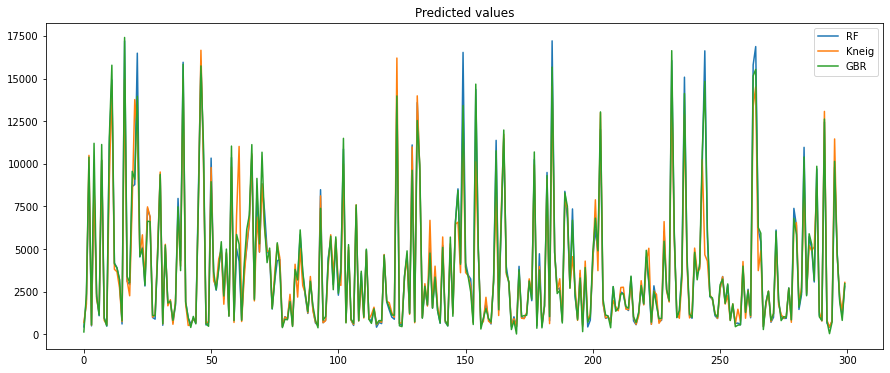

In [30]:
validation_results_df[["RF", "Kneig", "GBR"]][0:300].plot(figsize = (15,6)).set_title("Predicted values");

We also plot the importance of the features, to better understand how the price is modeled.

In [23]:
RF_imp = regmodels["RF"].feature_importances_
GBR_imp = regmodels["GBR"].feature_importances_

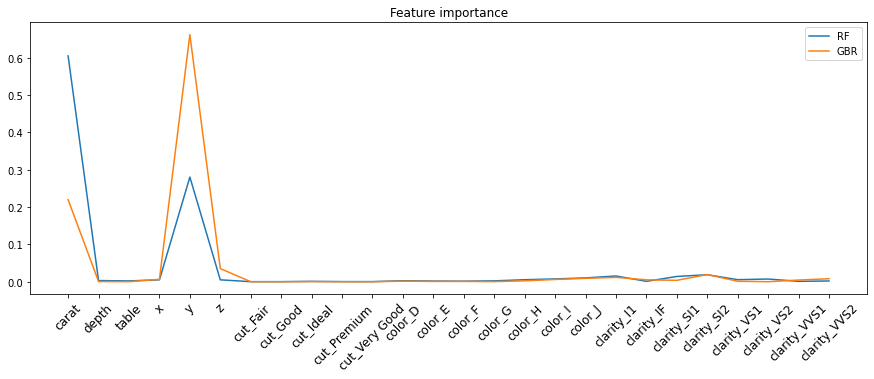

In [28]:
plt.figure(figsize = (15,5))
plt.plot(RF_imp)
plt.plot(GBR_imp)
x_ticks_labels = list(X_train.columns)
plt.xticks(range(len(RF_imp)), x_ticks_labels, rotation=45, fontsize=12)
plt.legend(["RF", "GBR"])
plt.title("Feature importance");

In [26]:
submit_df = pd.DataFrame(data =list(validation.index), columns = ["id"])
submit_df["price"] = validation_results_df["RF"]
#submit_df.to_csv("../data/y_pred_7.csv", index=False)